In [1]:
%load_ext tikzmagic
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML
def css_styling():
    styles = """
<style>
.output_png { text-align:  center; }
</style>
    """
    return HTML(styles)
css_styling()


## A little bit of history: Linear Perceptron

**Mark 1 perceptron** (Frank Rosenblatt, 1957): 
* An image recognition apparatus;
* 400 photo cells
* Weights are potentiometers;
* Weights are changed by electric motors.

The New York Times, 1958:
> [...] the embryo of an electronic computer that the Navy expects will be able to walk, talk, see, write, reproduce itself and be conscious of its existence.

<img style="margin: auto" width="80%" src="http://m.natemat.pl/b94a41cd7322e1b8793e4644e5f82683,641,0,0,0.png" alt="Frank Rosenblatt"/>

<img style="margin: auto" src="http://m.natemat.pl/02943a7dc0f638d786b78cd5c9e75742,641,0,0,0.png" width="70%" alt="Frank Rosenblatt"/>


<img style="margin:auto" src="http://www.newyorker.com/wp-content/uploads/2012/11/frank-rosenblatt-perception.jpg" width="60%"/>

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('cNxadbrN_aI', width=800, height=600)

## Training the perceptron (no human guidance)

Training cycle (2000 "epochs"):
* holding an image in front of the digital camera (eg. triangle, circle, square,...);
* observing which of the two lamps lit up (binary classes);
* checking if the lamp is correct (arbitrarily chosen);
* sending "reward" or "penalty" signal.
* human operator only performs mechanical actions.


## Multi-layer neural networks - Inference

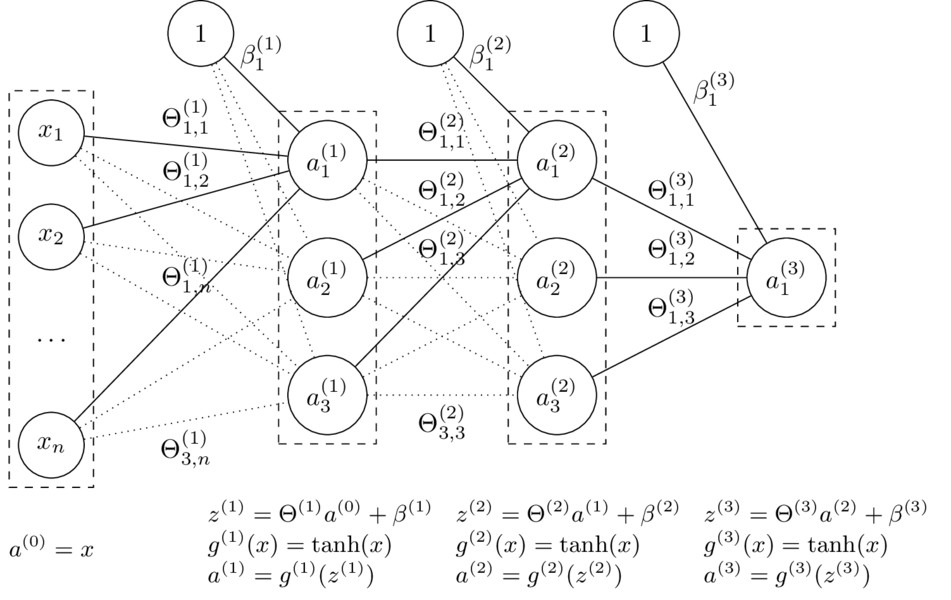

In [12]:
%%tikz -l arrows,automata,positioning,shapes,shapes.geometric,fit -f png -s 1000,600

\node[state] (x1) {$x_1$};
\node[state] (x2) [below=0.5cm of x1] {$x_2$};
\node[state, draw=none,fill=none] (dots) [below=0.5cm of x2] {$\cdots$};
\node[state] (xn) [below=0.5cm of dots] {$x_n$};

\node[state,circle] (a1) [below right=-0.33cm and 3cm of x1] {$a^{(1)}_1$};
\node[state,circle] (a2) [below=0.5cm of a1] {$a^{(1)}_2$};
\node[state,circle] (a3) [below=0.5cm of a2] {$a^{(1)}_3$};
\node[state] (b1) [above left=1cm and 1cm of a1] {$1$};

\node[state,circle] (a21) [right=2cm of a1] {$a^{(2)}_1$};
\node[state,circle] (a22) [below=0.5cm of a21] {$a^{(2)}_2$};
\node[state,circle] (a23) [below=0.5cm of a22] {$a^{(2)}_3$};
\node[state] (b2) [above left=1cm and 1cm of a21] {$1$};

\node[state,circle] (a31) [right=2cm of a22] {$a^{(3)}_1$};
\node[state] (b3) [right=2cm of b2] {$1$};

\path[-] 
(b1) edge node [above=.2cm, pos=0.5] {$\beta^{(1)}_{1}$} (a1)
(x1) edge node [above, pos=0.5] {$\Theta^{(1)}_{1,1}$} (a1)
(x2) edge node [above, pos=0.5] {$\Theta^{(1)}_{1,2}$} (a1)
(xn) edge node [above, pos=0.5] {$\Theta^{(1)}_{1,n}$} (a1);
                                     
\path[-, thin, dotted] 
(b1) edge node {} (a2)
(x1) edge node {} (a2)
(x2) edge node {} (a2)
(xn) edge node {} (a2)

(b1) edge node {} (a3)
(x1) edge node {} (a3)
(x2) edge node {} (a3)
(xn) edge node [below, pos=0.5] {$\Theta^{(1)}_{3,n}$} (a3);

\path[-] 
(b2) edge node [above=.2cm, pos=0.5] {$\beta^{(2)}_{1}$} (a21)
(a1) edge node [above, pos=0.5] {$\Theta^{(2)}_{1,1}$} (a21)
(a2) edge node [above, pos=0.5] {$\Theta^{(2)}_{1,2}$} (a21)
(a3) edge node [above, pos=0.5] {$\Theta^{(2)}_{1,3}$} (a21);

\path[-, thin, dotted] 
(b2) edge node {} (a22)
(a1) edge node {} (a22)
(a2) edge node {} (a22)
(a3) edge node {} (a22)

(b2) edge node {} (a23)
(a1) edge node {} (a23)
(a2) edge node {} (a23)
(a3) edge node [below, pos=0.5] {$\Theta^{(2)}_{3,3}$} (a23);

\path[-] 
(b3) edge node [above=.5cm, pos=0.5] {$\beta^{(3)}_{1}$} (a31)
(a21) edge node [above, pos=0.5] {$\Theta^{(3)}_{1,1}$} (a31)
(a22) edge node [above, pos=0.5] {$\Theta^{(3)}_{1,2}$} (a31)
(a23) edge node [above, pos=0.5] {$\Theta^{(3)}_{1,3}$} (a31);

\node [draw, dashed, fit=  (x1) (x2) (dots) (xn)] (w0) {};
\node [draw, dashed, fit= (a1) (a2) (a3)] (w1) {};
\node [draw, dashed, fit= (a21) (a22) (a23)] (w2) {};
\node [draw, dashed, fit= (a31)] (w3) {};

\node [draw, draw=none, fill=none, below=0.5cm of w0] (mw0) {\small$a^{(0)}=x$};
\node [draw, draw=none, fill=none, right=1.1cm of mw0] (mw1) 
{\small$\begin{array}{l}z^{(1)} = \Theta^{(1)} a^{(0)}  + \beta^{(1)}\\g^{(1)}(x)=\tanh(x)\\a^{(1)}=g^{(1)}(z^{(1)})\end{array}$};
\node [draw, draw=none, fill=none, right=-.3cm of mw1] (mw2) 
{\small$\begin{array}{l}z^{(2)} =  \Theta^{(2)} a^{(1)} + \beta^{(2)}\\g^{(2)}(x)=\tanh(x)\\a^{(2)}=g^{(2)}(z^{(2)})\end{array}$};
\node [draw, draw=none, fill=none, right=-.3cm of mw2] (mw3) 
{\small$\begin{array}{l}z^{(3)} =  \Theta^{(3)} a^{(2)} + \beta^{(3)}\\g^{(3)}(x)=\tanh(x)\\a^{(3)}=g^{(3)}(z^{(3)})\end{array}$};


## Inference 1

* Given a $n$-layer neural network and its parameters $\Theta^{1}, \ldots, \Theta^{L} $ oraz $\beta^{1}, \ldots, \beta^{L}$, we calculate for $l \in \{1,\ldots, L\}$: 
$$a^{l} = g^{l}\left( \Theta^{l} a^{l-1} + \beta^{l} \right). $$ 
* Parameters $\Theta^{l}$, weights on connection between neurons of layers $a^{l-1}$ and $a^{l}$, have size $\dim(a^{l}) \times \dim(a^{l-1})$. 
* Bias vectors $\beta$ replace columns with "1" in feature matrix. The size of $\beta^{l}$ is equal to the size of the corresponding layer $\dim(a^{l})$.

## Inference 2

* Function $g^{l}$ is the so called **activation function**;
* For $i = 0$ we assume $a^{0} = \mathrm{x}$ (features or input layer) and $g^{0}(x) = x$ (identity);
* In the case of classifiers, for the last layer $L$ often $g^{L}(x) = \mathop{\mathrm{softmax}}(x)$;
* Other activation functions are often sigmoids (eg. logistic function or hyperbolic tangens, $\tanh$);
* In the case of regression networks, the last layer consists often of a single neuron.


## Training multi-layer networks

* Parameters:
$$\Theta = (\Theta^{1},\Theta^{2},\Theta^{3},\beta^{1},\beta^{2},\beta^{3})$$

* Model:

$$h_\Theta(x) = \tanh(\Theta^{3}\tanh(\Theta^{2}\tanh(\Theta^{1} x +\beta^{1}) + \beta^{2}) + \beta^{3})$$
* Cost function (MSE):
$$J(\Theta) = \dfrac{1}{2m} \sum_{i=1}^{m} (h_\Theta(x^{(i)})- y^{(i)})^2 $$
* How do we calculate the gradients?
$$\nabla_{\Theta^{l}} J(\Theta) = ? \quad \nabla_{\beta^{l}} J(\Theta) = ? \quad l \in \{1,2,3\}$$

## Towards Backpropagation

* A hypothetical change $\Delta z^l_j$ added to the $j$-th neuron in layer $l$ propagates through the network and causes cost change: 

$$\frac{\partial J(\Theta)}{\partial z^{l}_j}  \Delta z^{l}_j$$

* If $\frac{\partial J(\Theta)}{\partial z^{l}_j}$ is large, $\Delta z^l_j$ with an opposite sign can reduce the cost.

* If $\frac{\partial J(\Theta)}{\partial z^l_j}$ is close to zero, the cost cannot be much improved.

* We define the error $\delta^l_j$ of neuron $j$ in layer $l$: $$\delta^l_j \equiv \dfrac{\partial J(\Theta)}{\partial z^l_j}
\qquad
\delta^l \equiv \nabla_{z^l} J(\Theta) \textrm{ (vectorized)} $$

## The four fundamental equations of Backpropagation (proofs anyone?)

$$
\begin{array}{ccll}
\delta^L & = & \nabla_{a^L}J(\Theta) \odot {(g^{L})}^{\prime}(z^L) & (BP1) \\[2mm]
\delta^{l} & = & ((\Theta^{l+1})^T \delta^{l+1}) \odot {{(g^{l})}^{\prime}}(z^{l}) & (BP2)\\[2mm]
\nabla_{\beta^l} J(\Theta) & = & \delta^l & (BP3)\\[2mm]
\nabla_{\Theta^l} J(\Theta) & = & a^{l-1} \odot \delta^l & (BP4)\\
\end{array}
$$


## The Backpropagation Algorithm
For one training example (x,y):

1. **Input**: Set the activations of the input layers $a^{0}=x$ 
2. **Forward step:** for $l=1,\dots,L$ calculate
$$z^{l} = \Theta^{(l)} a^{l-1}  + \beta^{l} \textrm{ and } a^{l}=g^{l}(z^{l})$$
3. **Output error $\delta^{L}$:** calculate vector $$\delta^{L}= \nabla_{a^L} J(\Theta) \odot (g^{L})^{\prime}(z^{L})$$
4. **Error backpropagation:** for $l = L-1,L-2,\dots,1$ calculate $$\delta^{l} = ((\Theta^{l+1})^T \delta^{l+1}) \odot {{(g^{l})}^{\prime}}(z^{l})$$
5. **Gradients:** 
    $$\nabla_{\Theta^{l}} J(\Theta) = a^{l-1} \odot \delta^{l} \textrm{ and } \nabla_{\beta^{l}} J(\Theta) = \delta^{l}$$

$$\small J(\Theta) = \frac{1}{2}(a^{L} - y)^2 $$
$$\small  \nabla_{a^{L}} J(\Theta) = a^{L} - y$$
$$\small \tanh^{\prime}(x) = 1 - \tanh^2(x)$$

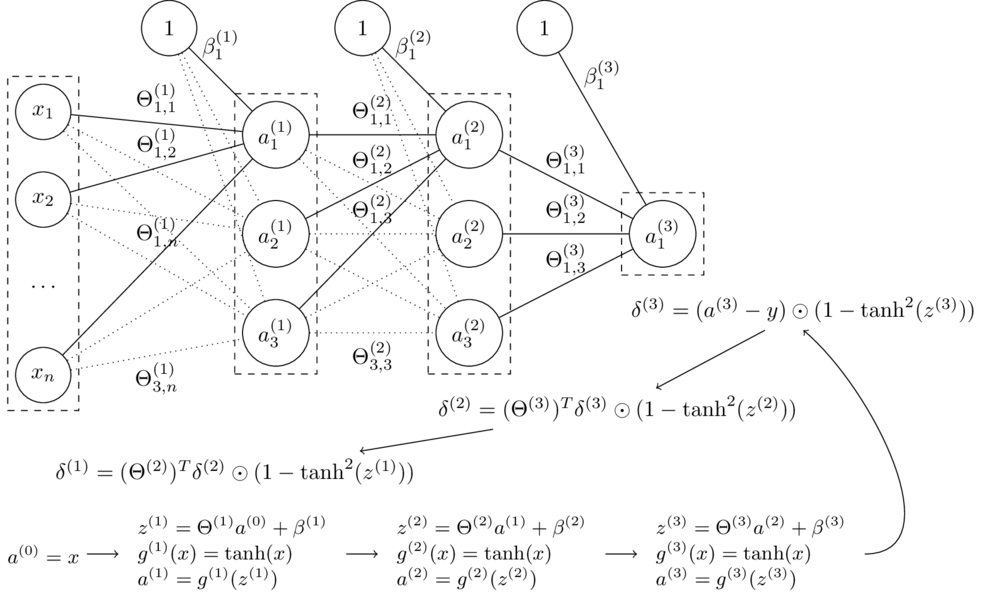

In [11]:
%%tikz -l arrows,automata,positioning,shapes,shapes.geometric,fit -f png -s 1000,600

\node[state] (x1) {$x_1$};
\node[state] (x2) [below=0.5cm of x1] {$x_2$};
\node[state, draw=none,fill=none] (dots) [below=0.5cm of x2] {$\cdots$};
\node[state] (xn) [below=0.5cm of dots] {$x_n$};

\node[state,circle] (a1) [below right=-0.33cm and 3cm of x1] {$a^{(1)}_1$};
\node[state,circle] (a2) [below=0.5cm of a1] {$a^{(1)}_2$};
\node[state,circle] (a3) [below=0.5cm of a2] {$a^{(1)}_3$};
\node[state] (b1) [above left=1cm and 1cm of a1] {$1$};

\node[state,circle] (a21) [right=2cm of a1] {$a^{(2)}_1$};
\node[state,circle] (a22) [below=0.5cm of a21] {$a^{(2)}_2$};
\node[state,circle] (a23) [below=0.5cm of a22] {$a^{(2)}_3$};
\node[state] (b2) [above left=1cm and 1cm of a21] {$1$};

\node[state,circle] (a31) [right=2cm of a22] {$a^{(3)}_1$};
\node[state] (b3) [right=2cm of b2] {$1$};

\node[draw=none, fill=none] (delta3) [below right=0.5cm and -1cm of a31] 
{$\delta^{(3)}=(a^{(3)}-y) \odot (1-\tanh^2(z^{(3)}))$};

\node[draw=none, fill=none] (delta2) [below right=0.5cm and -1cm of a23] 
{$\delta^{(2)}= (\Theta^{(3)})^T \delta^{(3)} \odot (1-\tanh^2(z^{(2)}))$};

\node[draw=none, fill=none] (delta1) [below right=1.5cm and -4cm of a3] 
{$\delta^{(1)}= (\Theta^{(2)})^T\delta^{(2)} \odot (1-\tanh^2(z^{(1)}))$};


\path[-] 
(b1) edge node [above=.2cm, pos=0.5] {$\beta^{(1)}_{1}$} (a1)
(x1) edge node [above, pos=0.5] {$\Theta^{(1)}_{1,1}$} (a1)
(x2) edge node [above, pos=0.5] {$\Theta^{(1)}_{1,2}$} (a1)
(xn) edge node [above, pos=0.5] {$\Theta^{(1)}_{1,n}$} (a1);
                                     
\path[-, thin, dotted] 
(b1) edge node {} (a2)
(x1) edge node {} (a2)
(x2) edge node {} (a2)
(xn) edge node {} (a2)

(b1) edge node {} (a3)
(x1) edge node {} (a3)
(x2) edge node {} (a3)
(xn) edge node [below, pos=0.5] {$\Theta^{(1)}_{3,n}$} (a3);

\path[-] 
(b2) edge node [above=.2cm, pos=0.5] {$\beta^{(2)}_{1}$} (a21)
(a1) edge node [above, pos=0.5] {$\Theta^{(2)}_{1,1}$} (a21)
(a2) edge node [above, pos=0.5] {$\Theta^{(2)}_{1,2}$} (a21)
(a3) edge node [above, pos=0.5] {$\Theta^{(2)}_{1,3}$} (a21);

\path[-, thin, dotted] 
(b2) edge node {} (a22)
(a1) edge node {} (a22)
(a2) edge node {} (a22)
(a3) edge node {} (a22)

(b2) edge node {} (a23)
(a1) edge node {} (a23)
(a2) edge node {} (a23)
(a3) edge node [below, pos=0.5] {$\Theta^{(2)}_{3,3}$} (a23);

\path[-] 
(b3) edge node [above=.5cm, pos=0.5] {$\beta^{(3)}_{1}$} (a31)
(a21) edge node [above, pos=0.5] {$\Theta^{(3)}_{1,1}$} (a31)
(a22) edge node [above, pos=0.5] {$\Theta^{(3)}_{1,2}$} (a31)
(a23) edge node [above, pos=0.5] {$\Theta^{(3)}_{1,3}$} (a31);

\node [draw, dashed, fit=  (x1) (x2) (dots) (xn)] (w0) {};
\node [draw, dashed, fit= (a1) (a2) (a3)] (w1) {};
\node [draw, dashed, fit= (a21) (a22) (a23)] (w2) {};
\node [draw, dashed, fit= (a31)] (w3) {};

\node [draw, draw=none, fill=none, below=2cm of w0] (mw0) {\small$a^{(0)}=x$};
\node [draw, draw=none, fill=none, right=.5cm of mw0] (mw1) 
{\small$\begin{array}{l}z^{(1)} =  \Theta^{(1)} a^{(0)} + \beta^{(1)}\\g^{(1)}(x)=\tanh(x)\\a^{(1)}=g^{(1)}(z^{(1)})\end{array}$};
\node [draw, draw=none, fill=none, right=.5cm of mw1] (mw2) 
{\small$\begin{array}{l}z^{(2)} = \Theta^{(2)}a^{(1)}  + \beta^{(2)}\\g^{(2)}(x)=\tanh(x)\\a^{(2)}=g^{(2)}(z^{(2)})\end{array}$};
\node [draw, draw=none, fill=none, right=.5cm of mw2] (mw3) 
{\small$\begin{array}{l}z^{(3)} = \Theta^{(3)}a^{(2)}  + \beta^{(3)}\\g^{(3)}(x)=\tanh(x)\\a^{(3)}=g^{(3)}(z^{(3)})\end{array}$};

\path[->] 
(mw0) edge node {} (mw1)
(mw1) edge node {} (mw2)
(mw2) edge node {} (mw3)
(mw3.east) edge[in=320,out=0] node {} (delta3.south)
;

\path[->] 
(delta3) edge node {} (delta2)
(delta2) edge node {} (delta1)
;

## SGD with Backpropagation

One iteration:
* For all parameters $\Theta = (\Theta^{1},\ldots,\Theta^{L})$ create zero-valued helper matrices $\Delta = (\Delta^{1},\ldots,\Delta^{L})$ of the same size ($\beta$ omitted for simplicity).
* For $m$ examples in the batch, $i = 1,\ldots,m$:
    * Perform backpropagation for example $(x^{(i)}, y^{(i)})$ and store the gradients $\nabla_{\Theta}J^{(i)}(\Theta)$
    * $\Delta := \Delta + \dfrac{1}{m}\nabla_{\Theta}J^{(i)}(\Theta)$
* Update the weights: $\Theta := \Theta - \alpha \Delta$

## A slightly different approach: Computation Graphs